<div style="text-align: right"> <h1>Carolyne Pelletier 101054962</h1></div>
<div style="text-align: right"> <h1>Akhil Dalal 100855466</h1></div>

## Question 1: Hopfield Network on MNIST Data using images of '1' and '5' only

### Hopfield Network 
A Hopfield Network is a form of recurrent neural network that is generally used for associative memories in which the network is able to memorize some states and patterns (1). It consists of a set of N neurons connected to weights in a symmetric way, with no self-connections. Therefore, to store images on a 28x28 matrix, the network needs 306,936 weights (784*734/2). The activation of a neuron is decided by the sign of the weighted sum of the connections to it. The output values of the network are fed back to the input in an undirected way.   

### Classification Accuracy Algorithm 

Our Classification Accuracy Algorithm is as follows:

1. Train network with 1's and 5's from training _images

2. Test network with testing_images (1's and 5's that it hasn't seen before), and for each resulting testing_image:
 
 
    i)  calculate Euclidean distance between testing_image and each training_image
    ii) the minimum of above calculation indicates classification

3. Classification accuracy is measured by the number of correct classifications divided by the number of testing_images 

Assumptions: We do not explicitly add noise to our testing_images, they are simply 1's and 5's that the network hasn't seen before

### Classification Accuracy Analysis

A Hopfield Network can only store approximately 0.15N patterns. For our network, this equals to approximately 117 patterns (0.15*784). We tested the classification accuracy of our network using various number of images used to train the network as seen below.



| Images |  Classification Accuracy | 
| ---------- | ------------- |
| 4 | 50.00%          
| 10 | 50.00%            
| 17 | 50.00%           
| 25 | 50.00%           
| 75 | 48.65%           
| 100 | 46.00%         

After looking into why our classification accuracy tends to stay at 50%, we noticed that our retrieve_pattern(noisey_input) function converges almost exclusively towards the 5 since it creates a blob like image that looks more like a 5 than a 1. Hopfield Networks are guaranteed to converge to a local minimum, but will sometimes converge to a false pattern (wrong local minimum) rather than the stored pattern (expected local minimum) (9). We are unsure whether this is the case or our network is damaged (we are leaning towards the latter).  

## Question 2: Self-Organizing Maps as a Substitute for K-means on Normalized MNIST Data using images of '1' and '5' only

### K-Means Clustering
K-means clustering is an unsupervised machine learning algorithm that partitions n-observations into a user-specified number (k) of clusters, in which each observation belongs to the cluster with the nearest mean. The mean of the cluster is called the centroid. 

Choosing the right number of clusters is imperative when performing k-means. To validate this point, we first plotted the location of the 1s (in purple) and 5s (in red) without performing k-means.

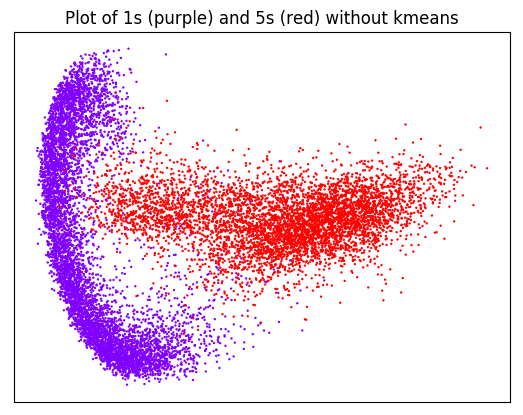

In [177]:
from IPython.display import Image
Image(filename="img/plot_1s_and_5s.png",width=400,height=400)

We then performed k-means with 2 clusters and 3 clusters respectivaly. In both these cases, we have too few clusters since many of the 1's are clustered with the 5's. Note that the centroids are marked with an X.

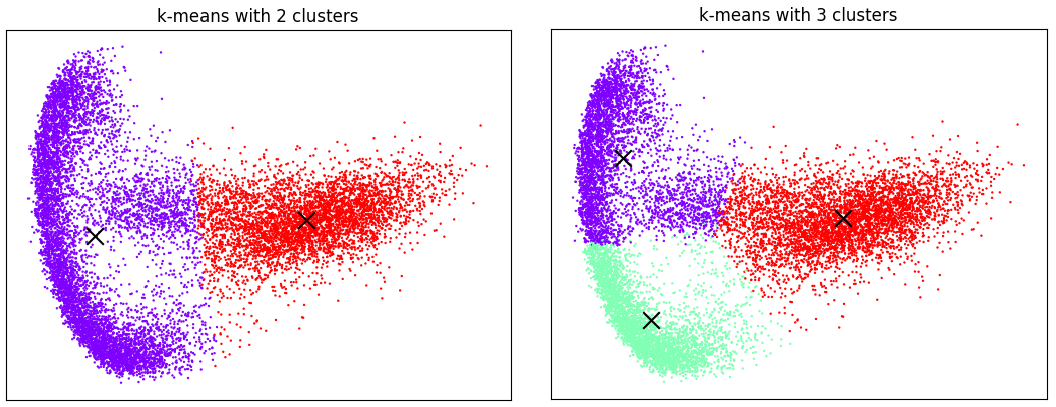

In [178]:
Image(filename="img/clusters_2_3.png",width=800,height=800)

K means with 4 or 5 clusters is the optimal way to partition the observations. This could be further validated using the elbow method. 

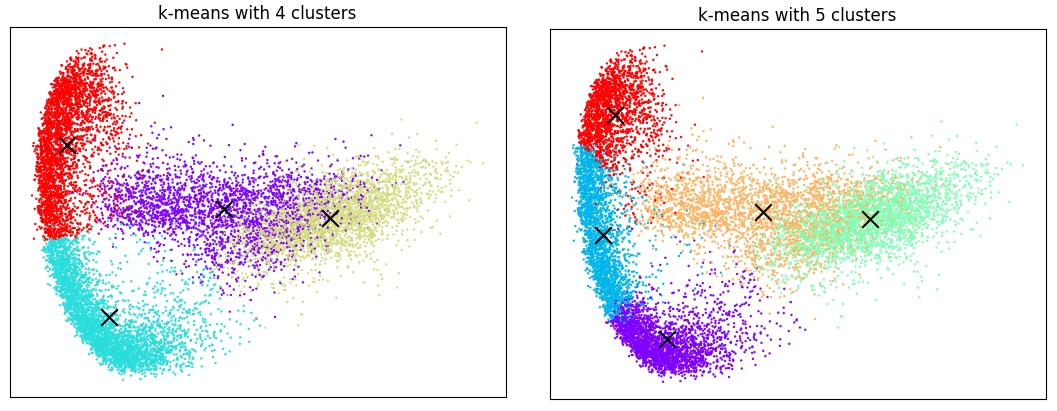

In [179]:
Image(filename="img/clusters_4_5.png",width=800,height=800)

K means with 6 clusters proves to be too many since 2 of the centroids are practically on top of eachother.

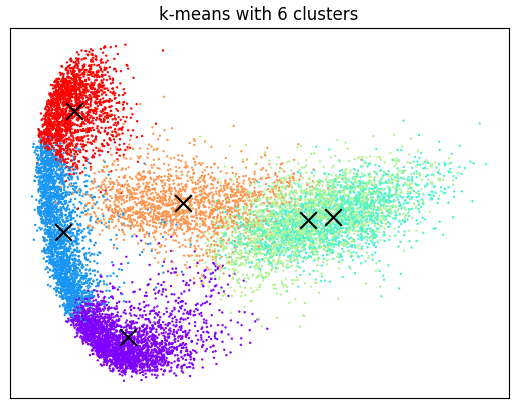

In [180]:
Image(filename="img/cluster_6.png",width=400,height=400)

Note that we performed k-means on full-dimentional data then reduced dimentionality using PCA, allowing us to plot in 2D. 


### Self-Organizing Maps
Self-Organizing Maps are a form of unsupervised competitive learning. The Network is arranged as a fully connected single-layer, where the output is organized in a two-dimensional arrangement of nodes. They are primarily used as a tool to visualize high-dimentional data onto a 2D map in which clusters of n-observations form. The use of SOMs as a substitute for k-means has been proposed (3). 

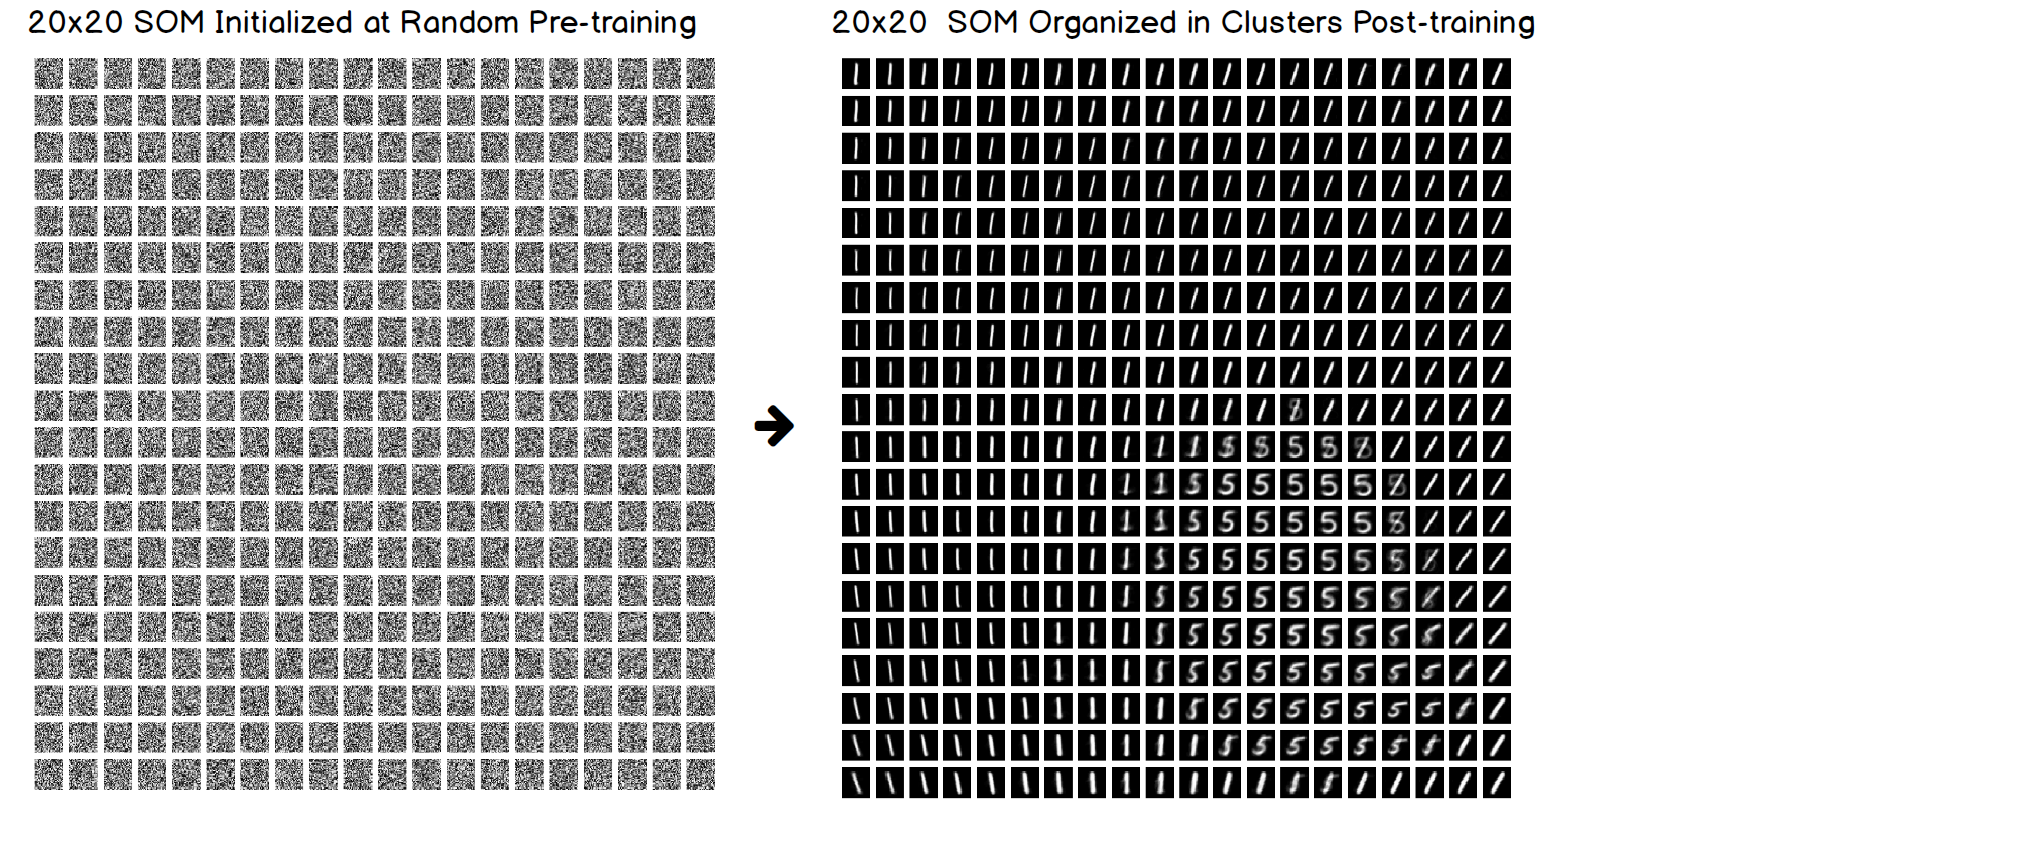

In [181]:
Image(filename="img/preSOM_postSOM.png",width=1200,height=1200)

Since the SOM is initialized at random, it will produce different outputs at the end of each training cycle. These different outputs, along with the dimensions of the SOM and learning parameters used to generate it are observed below. 

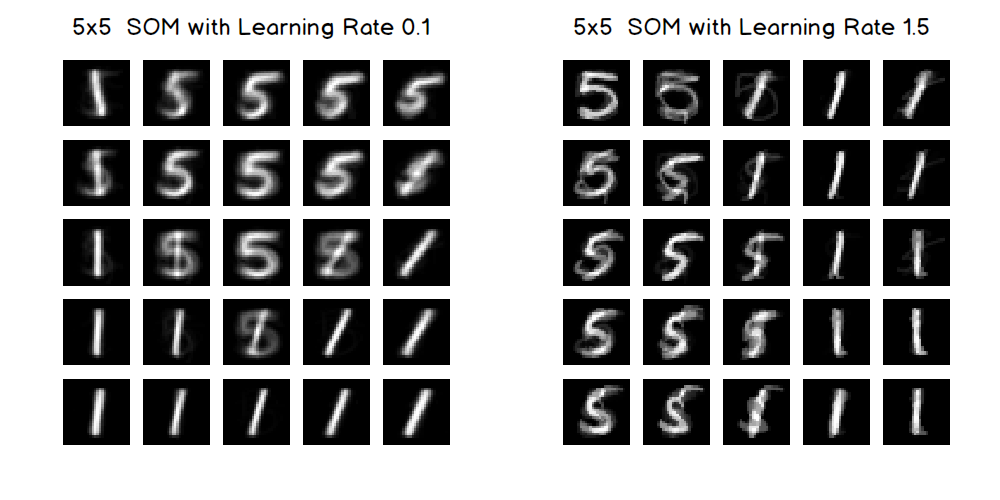

In [182]:
Image(filename="img/5x5_comparison.png",width=750,height=750)

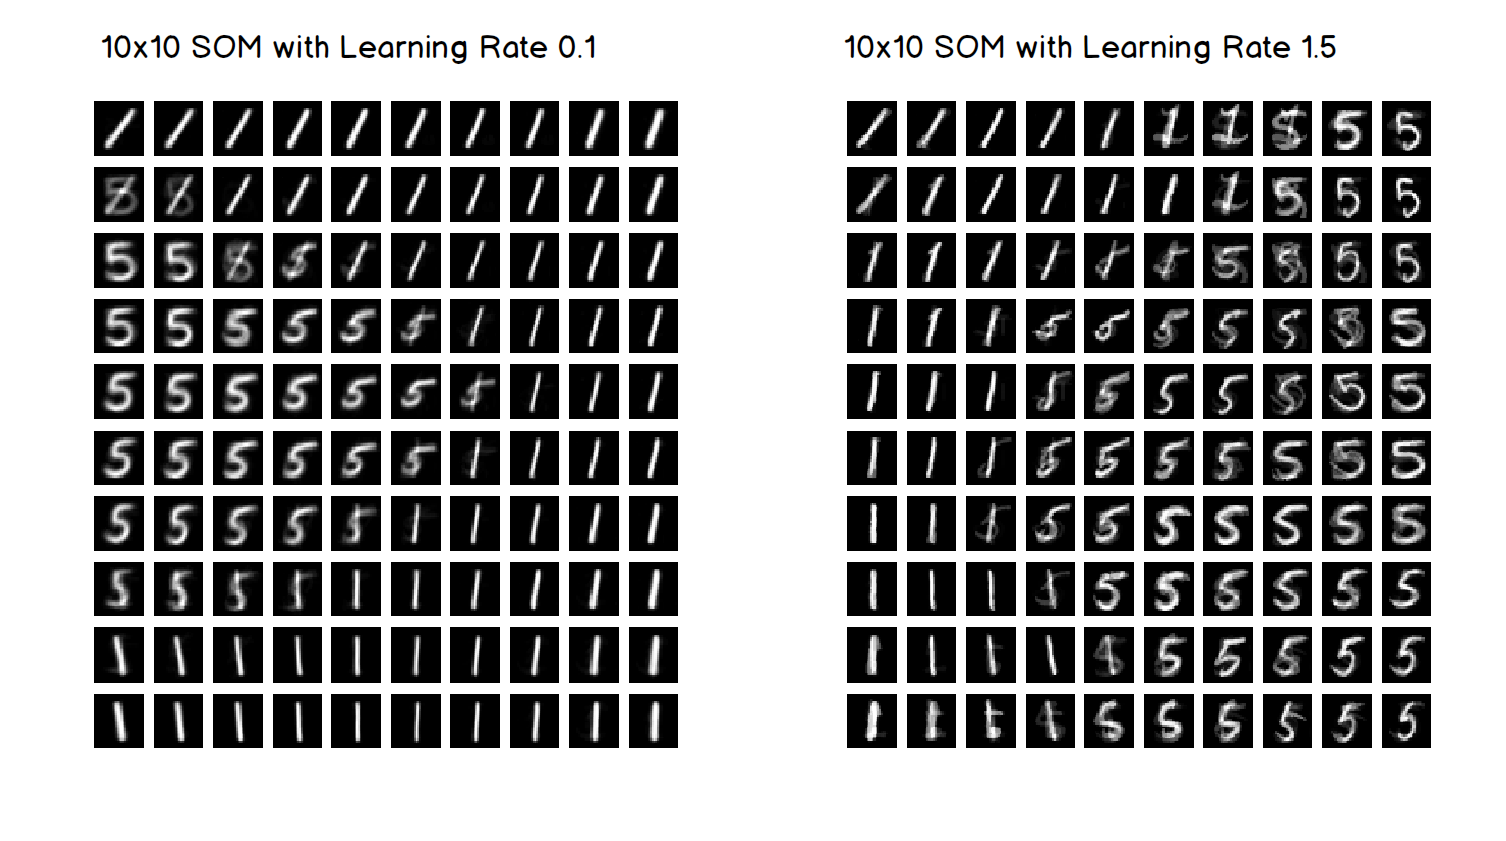

In [183]:
Image(filename="img/10x10_comparison.png",width=750,height=750)

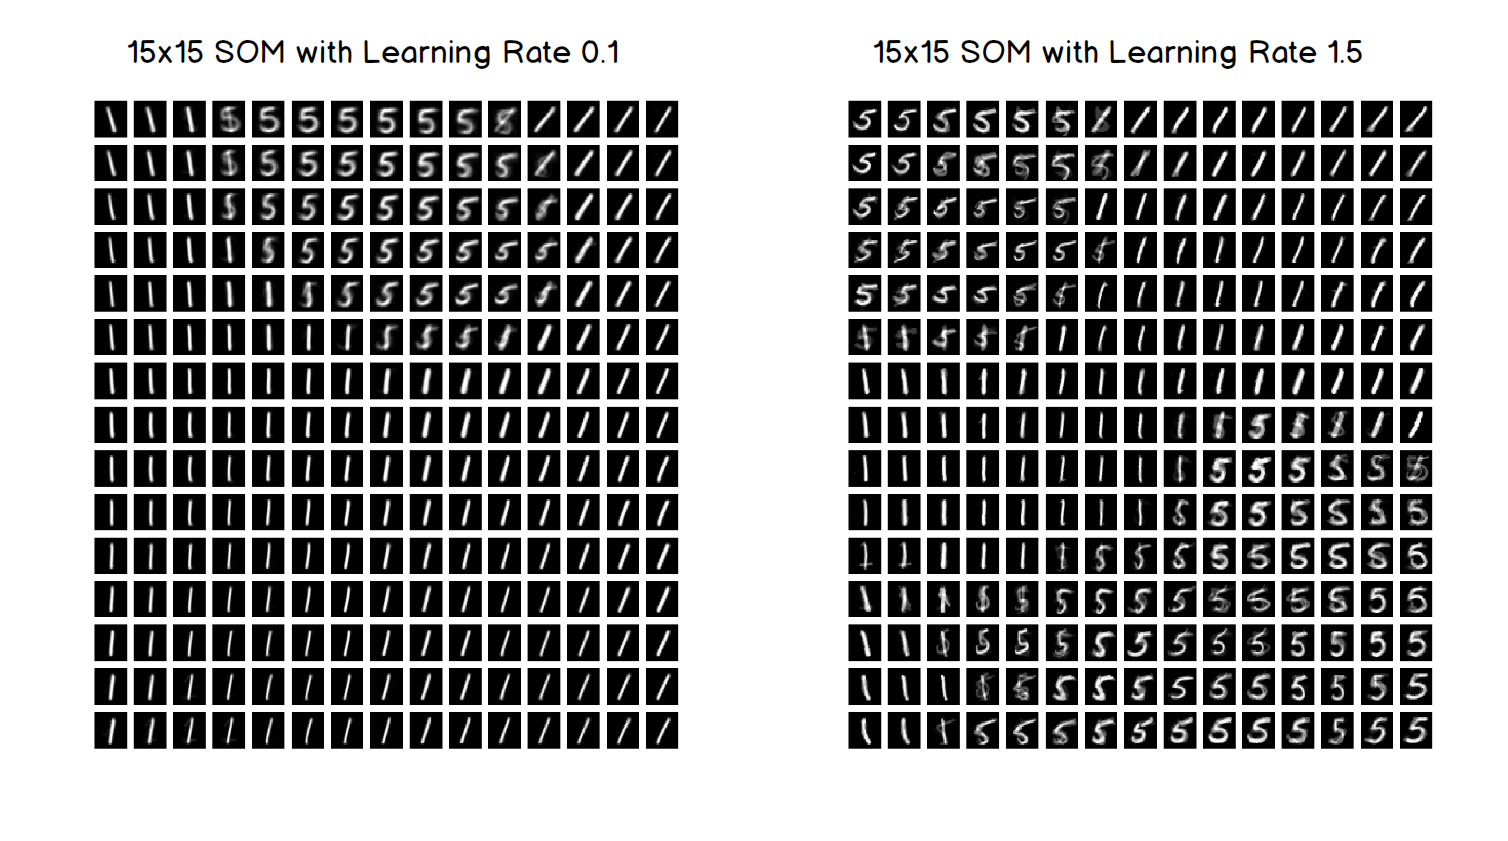

In [184]:
Image(filename="img/15x15_comparison.png",width=850,height=850)

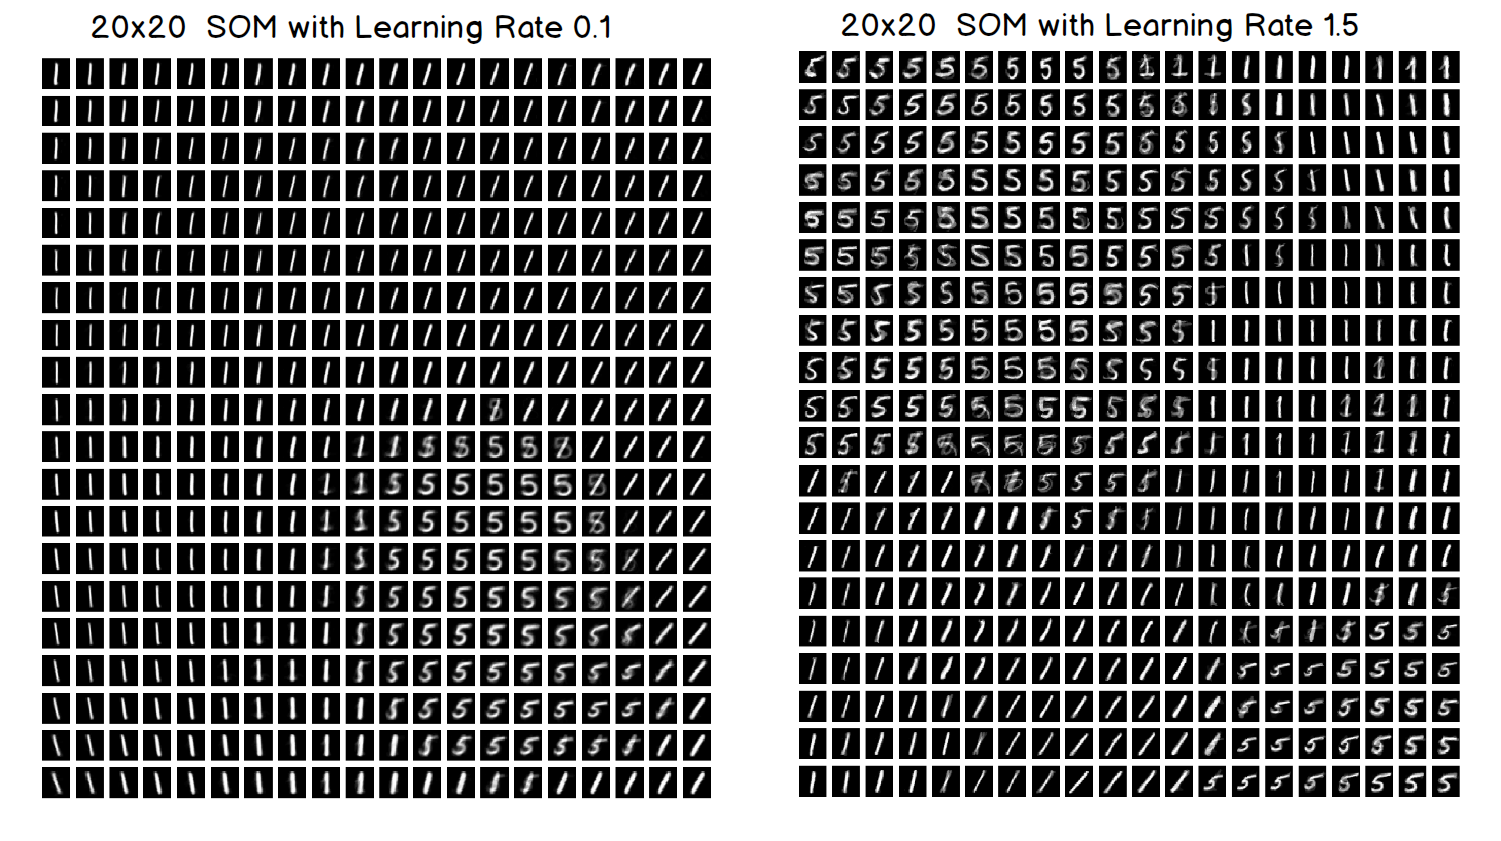

In [185]:
Image(filename="img/20x20_comparison.png",width=850,height=850)

### SOM Analysis

The size of the grid along with the learning rate changes how the clustering occurs. With enough data, we can train the SOM to represent the dataset quite well. The 5x5 dimension may not be enough to see the different kinds of 1s and 5s whereas the 20x20 dimenions seems to be too large in representing the numbers. Eg. there are a lot more "duplicates" of a single style of writing a 1. 10x10 and 15x15 seems to be the best dimensions.

## Question 3: Principal Component Analysis on Scikit-Learn Face Data

Principal Component Analysis (PCA) is a popular dimentionality reduction algorithm. PCA identifies the axis that accounts for the largest amount of variance in the training set. It then finds a second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance. It also finds a third axis, orthogonal to both previous axes, and a fourth, and so on - as many axes as the number of dimentions in the dataset (2). When used to reduce the dimentionaly of data, PCA projects the data in the least square sense - it captures big variability in the data and ignores small variability. 

In this question, we were asked to use PCA not as a data dimentionality reduction tool, but rather to use it on our data in full dimension to observe how it would perform as an input to a Feed Forward Neural Network. We then compare these network accuracy results to non-PCA'd data in full dimension as input to a Feed Forward Neural Network.

#### Raw Data Full-Dimension (learning rate = 0.1)

| Hidden Layer |   Neurons    | Training Accuracy | Testing Accuracy | 
| ---------- | ------------- | ------------- |
| 1 | 30  |9.07%   |   8.22%     
| 1 | 100  |11.59%   | 10.09%         


#### PCA Data Full-Dimension (learning rate = 0.1)

| Hidden Layer |   Neurons    | Training Accuracy | Testing Accuracy | 
| ---------- | ------------- | ------------- |
| 1 | 30  |6.37%   |   7.21%     
| 1 | 100  |6.55%   | 5.81%  

# Citations

1. Alice Julien-Laferriere. Hopfield Network p. 10, http://perso.ens-lyon.fr/eric.thierry/Graphes2010/alice-julien-laferriere.pdf

2. Aurélien Géron. Hands-On Machine Learning with Sckikit-Learn & TensorFlow p212. 

3. Fernando Bação, Victor Lobo, and Marco Painho. Self-organizing Maps as Substitutes for K-Means Clustering (2005), http://www.novaims.unl.pt/docentes/vlobo/Publicacoes/1_5_lobo05_SOM_kmeans.pdf.    

4. https://pmatigakis.wordpress.com/2014/01/18/character-recognition-using-hopfield-networks/

5. http://www.ai-junkie.com/ann/som/som1.html

6. http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

7. https://pmatigakis.wordpress.com/2014/01/18/character-recognition-using-hopfield-networks/

8. http://blog.yhat.com/posts/self-organizing-maps-2.html

9. https://en.wikipedia.org/wiki/Hopfield_network
